Versuch 245
===

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
from IPython.display import display, Math, Latex

## VI.1 Induktionsgesetz

#### Diagramm 1: Frequenz gegen Spannung

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

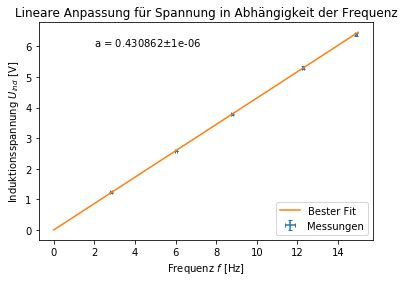

In [14]:
# Liste der Werten und Fehlern
f  = np.array([2.8, 6, 8.8, 12.3, 14.9]) # Hz
df = 0.05 * np.ones(5) # Hz
U1 = 10 ** -1 * np.array([24.6, 51.6, 75.5, 106, 128]) / 2 # V
dU1 = 10 ** -1 * np.array([0.2, 0.2, 0.5, 1, 1]) / 2 # V

# Funktion für lineare Anpassung
def line(x, a):
    return a * x

# Anpassung
popt, pcov = curve_fit(line, f, U1, sigma = dU1, absolute_sigma = True)
'''Fehler auf Abszisse wird nicht berücksichtigt, Python Prof meinte 
das wäre schwarze Magie'''
display(Math('a = ' + str(popt))) # Gibt als Argument Parameter a
display(Math(r'\Delta a =' + str(pcov))) # Diagonalelemente geben die Varianz der Parameter

# Plot
plt.errorbar(f, U1, yerr = dU1, fmt = 'none', capsize = 2, xerr = df,
             label = 'Messungen')
xfine = np.linspace(0., 15., 100)  # define values to plot the function for
plt.plot(xfine, line(xfine, *popt), '-', label = 'Bester Fit')
plt.title('Lineare Anpassung für Spannung in Abhängigkeit der Frequenz')
plt.xlabel('Frequenz $f$ [Hz]')
plt.ylabel('Induktionsspannung $U_{ind}$ [V]')
plt.text(2, 6, 'a = ' + str(round(popt[0], 6)) + '$\pm$' 
         + str(round(pcov[0,0], 6)))
plt.legend(loc = 'lower right')
display(Math(r'$\text{Benutzte Anpassung: } U_{ind} = a \cdot f$'))
        # display(Math()) für Latex
        # Anscheinend funktioniert es im pdf nicht 

# Save plot
plt.savefig('V245Diagramm1.png')
plt.show()

#### Diagramm 2: Strom und Spannung

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

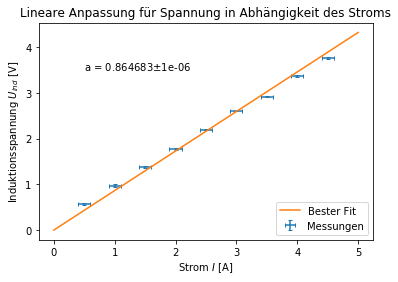

In [10]:
# Liste der Werten und Fehlern
I = np.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]) # A
dI = 0.1 * np.ones(9) # A
U2 = 10 ** -1 * np.array([11.5, 19.5, 27.5, 35.5, 44, 52, 58.4, 67.5, 75.3]) / 2 # V
dU2 = 10 ** -1 * np.array([0.5, 0.5, 0.5, 0.5, 0.1, 0.1, 0.2, 0.5, 0.5]) / 2 # V

# Anpassung
popt, pcov = curve_fit(line, I, U2, sigma = dU2, absolute_sigma = True) 
'''Fehler auf Abszisse wird nicht berücksichtigt, Python Prof meinte 
das wäre schwarze Magie'''
display(Math('a = ' + str(popt))) # Gibt als Argument Parameter a
display(Math(r'\Delta a =' + str(pcov))) # Diagonalelemente geben die Varianz der Parameter

# Plot
plt.errorbar(I, U2, yerr = dU2, fmt = 'none', capsize = 2,
             label = 'Messungen', xerr = dI)
xfine2 = np.linspace(0., 5., 100)  # define values to plot the function for
plt.plot(xfine2, line(xfine2, *popt), '-', label = 'Bester Fit',
         color = 'tab:orange')
plt.title('Lineare Anpassung für Spannung in Abhängigkeit des Stroms')
plt.xlabel('Strom $I$ [A]')
plt.ylabel('Induktionsspannung $U_{ind}$ [V]')
plt.text(0.5, 3.5, 'a = ' + str(round(popt[0], 6)) + '$\pm$' 
         + str(round(pcov[0,0], 6)))
plt.legend(loc = 'lower right')
display(Math(r'$\text{Benutzte Anpassung: } U_{ind} = a \cdot I$'))

# Save plot
plt.savefig('V245Diagramm2.png')
plt.show()

VI.2 Induktionsspannung bei periodischem Feldstrom
---

#### Diagramm 3: Winkel gegen Spannung

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

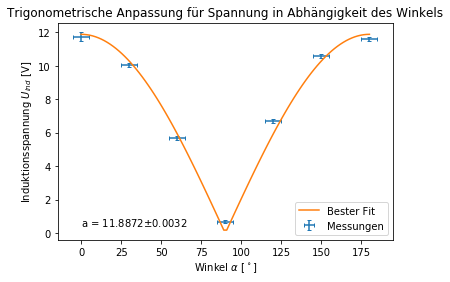

In [11]:
# Liste der Werten und Fehlern
alpha = np.array([0, 30, 60, 90, 120, 150, 180]) # Grad
dalpha = 5 * np.ones(7) # Grad
U3 = np.array([23.5, 20.1, 11.4, 1.4, 13.4, 21.2, 23.2]) / 2 # V
dU3 = np.array([0.5, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]) / 2 # V

# Funktion für trigonometrische Anpassung
def cosine(x, a):#, b):#, c):
    return a * np.abs(np.cos(np.radians(x)))# + c
    # np.abs weil nur die Spitze-Spitze Spannung gemessen wurde

# Anpassung
popt, pcov = curve_fit(cosine, alpha, U3, sigma = dU3, absolute_sigma = True) 
'''Fehler auf Abszisse wird nicht berücksichtigt, Python Prof meinte 
das wäre schwarze Magie'''
display(Math('a = ' + str(popt))) # Gibt als Argument Parameter a
display(Math(r'\Delta a =' + str(pcov))) # Diagonalelemente geben die Varianz der Parameter

# Plot
plt.errorbar(alpha, U3, yerr = dU3, fmt = 'none', capsize = 2, 
             label = 'Messungen', xerr = dalpha)
xfine3 = np.linspace(0., 180, 100)  # define values to plot the function for
plt.plot(xfine3, cosine(xfine3, *popt), '-', label = 'Bester Fit',
         color = 'tab:orange')
plt.title('Trigonometrische Anpassung für Spannung in Abhängigkeit des Winkels')
plt.xlabel('Winkel $\\alpha$ [$^\circ$]')
plt.ylabel('Induktionsspannung $U_{ind}$ [V]')
plt.text(0, 0.4, 'a = ' + str(round(popt[0], 4)) + '$\pm$' 
         + str(round(pcov[0,0], 4)))
plt.legend(loc = 'lower right')
display(Math(r'$\text{Benutzte Anpassung: } U_{m} = a \cdot |\cos{\alpha}|$'))

# Save plot
plt.savefig('V245Diagramm3.png')
plt.show()

#### Diagramm 4: Verhältnis zwischen induzierter und angelegter Strom gegen Frequenz

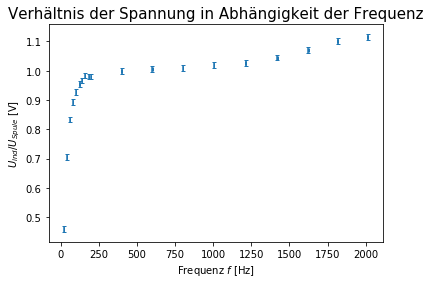

In [12]:
# Liste der Werten und Fehlern
f4 = np.array([20.6, 40.8, 59.8, 80.2, 101, 123.3, 140.3, 161, 184.5, 199.6,
              399, 601, 801, 1004, 1212, 1420, 1622, 1817, 2012]) # Hz
df4 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.5, 0.6, 0.6, 1, 2, 2, 2,
               2, 3, 3, 3, 4]) # Hz
I4 = np.array([275.7, 214.7, 172.9, 138.6, 114.5, 96.2, 85.3, 75.1, 66, 61.4,
               31.2, 20.7, 15.6, 12.4, 10.3, 8.76, 7.63, 6.76, 6]) # mA
dI4 = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
               0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.05]) # mA
U4 = 10 ** -1 * np.array([13.8, 21.2, 25, 26.8, 27.8, 28.6, 29, 29.5, 29.4, 29.4, 29.8,
               30, 30.1, 30.2, 30.2, 30.3, 30.6, 30.8, 31.2]) / 2 # V
dU4 = 10 ** -1 * 0.1 * np.ones(19) # V
USpule = np.array([1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.49,
                  1.49, 1.49, 1.48, 1.47, 1.45, 1.43, 1.4, 1.4]) # V
dUSpule = 0.025 * np.ones(19)
R = U4 / I4
dR =  np.sqrt((dU4 / I4 ) ** 2 + (U4 / (I4 ** 2) * dI4) ** 2)

# Plot
plt.errorbar(f4, U4 / USpule, yerr = dU4, fmt = 'none', capsize = 2, 
             label = 'Messungen', xerr = df4)
plt.title('Verhältnis der Spannung in Abhängigkeit der Frequenz', size = 15)
plt.xlabel('Frequenz $f$ [Hz]')
plt.ylabel('$U_{ind} / U_{Spule}$ [V]')

# Save plot
plt.savefig('V245Diagramm4.png')
plt.show()

#### Diagramm 5: Widerstand gegen Frequenz

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

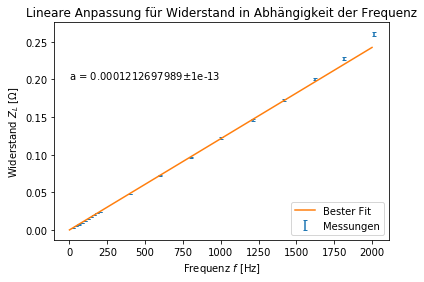

In [13]:
# Plot für Widerstand

# Funktion für lineare Anpassung
def line(x, a):
    return a * x

# Anpassung
popt, pcov = curve_fit(line, f4, R, sigma = dR, absolute_sigma = True) 
'''Fehler auf Abszisse wird nicht berücksichtigt, Python Prof meinte 
das wäre schwarze Magie'''
display(Math('a = ' + str(popt))) # Gibt als Argument Parameter a
display(Math(r'\Delta a =' + str(pcov))) # Diagonalelemente geben die Varianz der Parameter

# Plot
plt.errorbar(f4, R, yerr = dR, fmt = 'none', capsize = 2, 
             label = 'Messungen')
xfine4 = np.linspace(0., 2000, 300)  # define values to plot the function for
plt.plot(xfine4, line(xfine4, *popt), '-', label = 'Bester Fit',
         color = 'tab:orange')
plt.title('Lineare Anpassung für Widerstand in Abhängigkeit der Frequenz')
plt.xlabel('Frequenz $f$ [Hz]')
plt.ylabel('Widerstand $Z_L$ [$\\Omega$]')
plt.text(0, 0.2, 'a = ' + str(round(popt[0], 13)) + '$\pm$' 
         + str(round(pcov[0,0], 13)))
plt.legend(loc = 'lower right')
display(Math(r'$\text{Benutzte Anpassung: } Z_L = a \cdot f$'))
    
# Save plot
plt.savefig('V245Diagramm5.png')
plt.show()